In [2]:
import math
import pandas as pd
import numpy as np

In [6]:
# citations
# https://www.instagram.com/kpbs/?hl=en
# https://www.facebook.com/KPBSSanDiego/
# https://www.pewresearch.org/journalism/2020/07/30/americans-who-mainly-get-their-news-on-social-media-are-less-engaged-less-knowledgeable/
# https://www.pewresearch.org/journalism/2018/09/10/news-use-across-social-media-platforms-2018/
# https://cdn.kpbs.org/08/6f/bc092fe0432e85004da24995ef88/2023-kpbs-afs.pdf
# https://backlinko.com/instagram-users
# https://www.theverge.com/2024/11/13/24295477/bluesky-is-almost-at-15-million-users
# https://www.warc.com/newsandopinion/news/social-media-user-overlaps-mapped/en-gb/46624
# https://www.namepepper.com/bluesky-statistics
# https://en.m.wikipedia.org/wiki/File:Bluesky_Registered_Users.svg#metadata
# https://www.statista.com/topics/737/twitter/#topicOverview# https://www.demandsage.com/facebook-statistics/#:~:text=As%20of%202024%2C%20Facebook%20has,which%20has%20194.1%20million%20users.

In [7]:
# kpbs_IG 45.2k followers
# _kpbs_facebook 70k followers
# 132 mentions on kpbs since and before bluesky's official launch in Feb 6, 2024
# instagram monthly active users 2 billion
# Facebook 3 billion active users
# twitter/ 429 million users 
# bluesky users base 14,980,000
# 18%-47%  of people get news from social media

In [3]:
# Perform the conversion rate
kpbs_ig = 45200 / 2000000000
kpbs_fb = 70000 / 3000000000
kpbs_X= 45100 /429000000  #kpbs left twitter/X on 4/17/2023
# Calculate the average
average = (kpbs_ig + kpbs_fb + kpbs_X ) / 3

# Print the results with more readable float format
print("kpbs_ig: {:.10f}".format(kpbs_ig))
print("kpbs_fb: {:.10f}".format(kpbs_fb))
print("kpbs_X: {:.10f}".format(kpbs_X))
print("Average: {:.10f}".format(average))


kpbs_ig: 0.0000226000
kpbs_fb: 0.0000233333
kpbs_X: 0.0001051282
Average: 0.0000503538


In [4]:
kpbs_ig_conversion_rt=0.0000226000
kpbs_fb_conversion_rt=0.0000233333
kpbs_X_conversion_rt=0.0001051282
kpbs_ig_fb__X_conversion_rt_avg=0.0000503538

In [7]:
# estimate potential follower base in bluesky
# equation: potential_followers_on_bluesky=User_Base_on_bluesky x kpbs_Average Conversion Rate
# average the kpbs facebook and instagram conversion rates
User_Base_on_bluesky=15200000  #at the time of this calculation
potential_followers_on_bluesky= User_Base_on_bluesky * (kpbs_ig_fb__X_conversion_rt_avg)

print(potential_followers_on_bluesky)

765.37776


In [8]:
actual_mentions_on_bluesky= 132


In [9]:
# get the difference of actual mentions and potential followers of kpbs on blusesky
number_of_followers_who_might_engage_with_kpbs_bluesky= potential_followers_on_bluesky-actual_mentions_on_bluesky
print(number_of_followers_who_might_engage_with_kpbs_bluesky)

633.37776


In [10]:
# using pew research data, calculate weighted follower ranges  and apply a confidence interval
low_range= potential_followers_on_bluesky * 0.18
high_range= potential_followers_on_bluesky * 0.47
print(low_range)
print(high_range)

137.7679968
359.72754719999995


In [11]:
high_range

359.72754719999995

In [12]:
# confidence intervals for potential followers of kpbs on bluesky 

# Calculate low estimate (minus 5%)
low_estimate_ci_lower = low_range * 0.95
print("Low Estimate_lower:", round(low_estimate_ci_lower))
low_estimate_ci_upper = low_range * 1.05
print("Low Estimate_upper:", round(low_estimate_ci_upper))
# Calculate high estimate (plus 5%)
high_estimate_ci_lower = high_range * 0.95
print("High Estimate_lower:", round(high_estimate_ci_lower))
high_estimate_ci_upper = high_range * 1.05
print("High Estimate_upper:", round(high_estimate_ci_upper))


Low Estimate_lower: 131
Low Estimate_upper: 145
High Estimate_lower: 342
High Estimate_upper: 378


In [13]:
# estimate. Calculate Per-Follower Revenue and Contributions
kpbs_fb_followers= 70000
kpbs_ig_followers=45200
kpbs_X_followers=45100
combined_kpbs_followers =kpbs_fb_followers + kpbs_ig_followers + kpbs_X_followers
print(combined_kpbs_followers)

160300


In [16]:
# Divide KPBS’s station-generated support by this combined follower count to obtain a single revenue-per-follower metric.
# Station-generated support typically comes from local users and subscribers. 
# This offers a more accurate reflection of the community's direct engagement and support for KPBS.
# We exclude the contribution line from the operating revenue of KPBS's financial statement 
# due to potential corporate contributions, nonprofit donors, and endowments, which can skew the level of local community support.
# Average 2021-2023. use weighted avg for 2022 & 2023, assuming 2021 lower figures were a corollary from the covid pandemic.
station_generated_support_2021= 77981
station_generated_support_2022= 319953
station_generated_support_2023= 266369
# Weights for 2022 and 2023
weight_2022 = 0.4 # This weight ensures that its influence is acknowledged but not as heavily as the most recent year.
weight_2023 = 0.6 # this weight reflects recency and it is more distant from the covid corollary.

# Calculate the weighted average for 2022 and 2023
weighted_avg_22_23 = (weight_2023 * station_generated_support_2023) + (weight_2022 * station_generated_support_2022)

# Calculate the overall average including 2021
station_generated_support_avg = (weighted_avg_22_23 + station_generated_support_2021) / 2
revenue_per_follower_metric_raw=combined_kpbs_followers/station_generated_support_avg
# print
print("Weighted Average for 2022 and 2023: ${:,.2f}".format(weighted_avg_22_23))
print("station_generated_support_avg: ${:,.2f}".format(station_generated_support_avg))
print(revenue_per_follower_metric_raw)

Weighted Average for 2022 and 2023: $287,802.60
station_generated_support_avg: $182,891.80
0.8764745056913432


In [17]:
# weight the revenue per follower metric
weighted_revenue_per_follower_lower=revenue_per_follower_metric_raw*low_estimate_ci_lower
weighted_revenue_per_follower_upper=revenue_per_follower_metric_raw*high_estimate_ci_upper
print(weighted_revenue_per_follower_lower)
print(weighted_revenue_per_follower_upper)

114.71263005059822
331.0566253214633


In [18]:
# adjust for social media overlap. 74% of fb is on ig and 85% of ig users are on fb

Unique_Facebook_Users_on_ig=kpbs_fb_followers*0.74
Unique_ig_Users_on_fb=kpbs_ig_followers*0.85
print(Unique_Facebook_Users_on_ig)
print(Unique_ig_Users_on_fb)

51800.0
38420.0


In [19]:
# Adjust for social media overlap. 74% of FB is on IG and 85% of IG users are on FB
kpbs_fb_followers = 70000  # Example value, replace with actual
kpbs_ig_followers = 45200  # Example value, replace with actual

Unique_Facebook_Users_on_ig = kpbs_fb_followers * 0.74
Unique_ig_Users_on_fb = kpbs_ig_followers * 0.85

print("Facebook users also on Instagram:", Unique_Facebook_Users_on_ig)
print("Instagram users also on Facebook:", Unique_ig_Users_on_fb)

# Twitter overlap. 53% of facebook users are on twitter and 60% of instagram users are on twitter.
Unique_Facebook_users_on_twitter = kpbs_fb_followers * 0.53
Unique_Instagram_users_on_twitter = kpbs_ig_followers * 0.60

print("Facebook users also on Twitter:", Unique_Facebook_users_on_twitter)
print("Instagram users also on Twitter:", Unique_Instagram_users_on_twitter)


Facebook users also on Instagram: 51800.0
Instagram users also on Facebook: 38420.0
Facebook users also on Twitter: 37100.0
Instagram users also on Twitter: 27120.0


In [22]:
# get unique followers: Unique Followers =kpbs_fb_followers + kpbs_ig_followers−Overlap
# use the smaller overlap to avoid double counting twice
overlap=Unique_ig_Users_on_fb
Unique_Followers = kpbs_fb_followers + kpbs_ig_followers - overlap
print(Unique_Followers)

76780.0


In [21]:
# Determine the overall overlap. Use the smaller overlap to avoid double counting twice
# Using the smaller overlap between FB and IG
overlap_fb_ig = min(Unique_Facebook_Users_on_ig, Unique_ig_Users_on_fb)

# Calculate unique followers for FB and IG first
Unique_Followers_no_twitter = kpbs_fb_followers + kpbs_ig_followers - overlap_fb_ig
print("Unique Followers without Twitter:", Unique_Followers_no_twitter)

# Now include Twitter
# Calculate unique followers with Twitter
# Here we need to consider overlaps for all three platforms accurately
Unique_Followers = (
    Unique_Followers_no_twitter + 
    Unique_Facebook_users_on_twitter + 
    Unique_Instagram_users_on_twitter - # ensure we are not double counting users
    min(Unique_Facebook_users_on_twitter, Unique_Instagram_users_on_twitter)
)

print("Total unique followers across FB, IG, and Twitter:", Unique_Followers)


Unique Followers without Twitter: 76780.0
Total unique followers across FB, IG, and Twitter: 113880.0


In [23]:
# adjust opportunity loss calculation factoring the overlap
lower_bound_op_loss_overlap_adjusted= weighted_revenue_per_follower_lower*Unique_Followers/combined_kpbs_followers
upper_bound_op_loss_overlap_adjusted= weighted_revenue_per_follower_upper*Unique_Followers/combined_kpbs_followers
print(lower_bound_op_loss_overlap_adjusted)
print(upper_bound_op_loss_overlap_adjusted)

54.94470202922603
158.5684821720646


In [22]:
sol=0.43*115200
sol

49536.0

In [23]:
# potential revenue kpbs gets from ig and facebook followers. 

sol_l=49536*.18
sol_u=49536*.47
print(sol_l)
print(sol_u)

8916.48
23281.92


In [25]:
# https://en.m.wikipedia.org/wiki/File:Bluesky_Registered_Users.svg#metadata
# get monthly bluesky new users growth
feb_2024=3140008-2889718
mar_2024=5099009-3140008
apr_2024=5305827-5099009
may_2024=5589425-5305827
june_2024=5698531-5589425
july_2024=5988217-5698531

In [26]:
# blue sky 2024 monthly users
feb_2024
mar_2024
apr_2024
may_2024
june_2024
july_2024

289686

In [27]:
# get august through mid november estimates
aug_2024=6504634
sept_2024=11104634
oct_2024=13000000
mid_nov_2024=15000000

In [28]:
# Monthly new user numbers for Bluesky (replace the example data with your actual data)

# List of vectors
blsky_month = [
    ('feb_2024', feb_2024),
    ('mar_2024', mar_2024),
    ('apr_2024', apr_2024),
    ('may_2024', may_2024),
    ('june_2024', june_2024),
    ('july_2024', july_2024)
]

# Print the numbers stored in each vector
for name, blsky_month in blsky_month:
    print(f"Values in {name}: {blsky_month}")


Values in feb_2024: 250290
Values in mar_2024: 1959001
Values in apr_2024: 206818
Values in may_2024: 283598
Values in june_2024: 109106
Values in july_2024: 289686


In [29]:
monthly_avg=np.mean([feb_2024,
mar_2024,
apr_2024,
may_2024,
june_2024,
july_2024])

In [30]:
monthly_avg
516,416.5

(516, 416.5)

C:\Users\Dave\AppData\Local\Temp\ipykernel_10516\356787656.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2024-02', periods=10, freq='M')
C:\Users\Dave\AppData\Local\Temp\ipykernel_10516\356787656.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months = pd.date_range(start=df['Month'].max() + timedelta(days=1), periods=12, freq='M')
C:\Users\Dave\anaconda3\envs\myenv310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


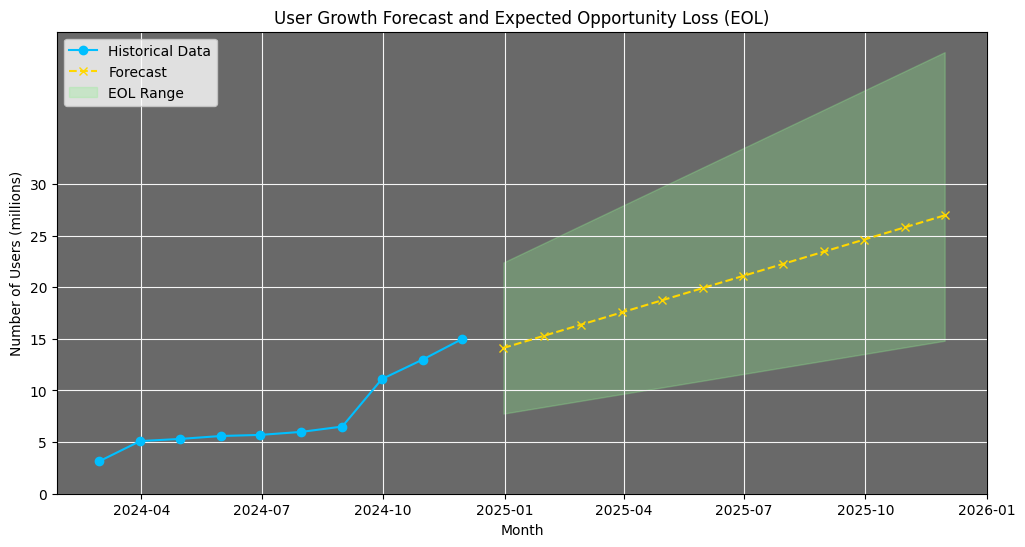

C:\Users\Dave\EDA\user_growth_KPBS_Bluesky.pdf

In [49]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Updated user data from February to November
user_data = [3140008, 5099009, 5305827, 5589425, 5698531, 5988217, 6504634, 11104634, 13000000, 15000000]  # Feb to November user counts
months = pd.date_range(start='2024-02', periods=10, freq='M')

# Create DataFrame
df = pd.DataFrame({'Month': months, 'Users': user_data})

# Convert months to numeric values for regression
df['Month_Num'] = (df['Month'] - df['Month'].min()).dt.days

# Fit Linear Regression Model
model = LinearRegression()
model.fit(df[['Month_Num']], df['Users'])

# Forecast for the next 12 months
future_months = pd.date_range(start=df['Month'].max() + timedelta(days=1), periods=12, freq='M')
future_month_nums = np.array((future_months - df['Month'].min()).days).reshape(-1, 1)

# Predict future user numbers
future_users = model.predict(future_month_nums)

# Calculate lower and upper bounds based on initial bounds and projected user growth
# Adjust based on unique followers and projected growth
initial_users = 15000000  # Starting with current bluesky user count
eol_lower_bound_initial = 54.94  # Adjusted for overlap
eol_upper_bound_initial = 158.57  # Adjusted for overlap

# Adjust based on unique followers
eol_lower_bound = initial_users * (eol_lower_bound_initial / combined_kpbs_followers)
eol_upper_bound = initial_users * (eol_upper_bound_initial / combined_kpbs_followers)

# Apply these to the future users to get projected EOL
future_eol_lower_bound = eol_lower_bound + (future_users * (eol_lower_bound_initial / 100))
future_eol_upper_bound = eol_upper_bound + (future_users * (eol_upper_bound_initial / 100))

# Plot the historical and forecasted user growth
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df['Month'], df['Users'], label='Historical Data', color='deepskyblue', marker='o')
plt.plot(future_months, future_users, label='Forecast', color='gold', linestyle='--', marker='x')
plt.fill_between(future_months, future_eol_lower_bound, future_eol_upper_bound, color='lightgreen', alpha=0.3, label='EOL Range')
plt.title('User Growth Forecast and Expected Opportunity Loss (EOL)')
plt.xlabel('Month')
plt.ylabel('Number of Users (millions)')
plt.yticks(np.arange(0, max(all_users) + 5000000, 5000000), labels=np.arange(0, max(all_users)/1e6 + 5, 5).astype(int))
plt.legend()
plt.grid(True, color='whitesmoke') # Change the grid color to whitesmoke
plt.gca().set_facecolor('dimgrey') # Change the background color to dimgrey
plt.show()

# Combine historical and forecasted data for further analysis
all_months = np.concatenate([df['Month'].values, future_months])
all_users = np.concatenate([df['Users'].values, future_users])

# Save the plot as a PDF
with PdfPages('user_growth_KPBS_Bluesky.pdf') as pdf: 
    pdf.savefig(fig)  # saves the current figure into a pdf page
    plt.close()

# Download the PDF file in Jupyter Notebook
FileLink(r'user_growth_KPBS_Bluesky.pdf')


In [50]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import FileLink

# Data
labels = ['Total Mentions', 'Beta Launch: Feb, 2023 (invite only)', 'Official Launch: Feb-mid Nov, 2024']
mentions = [132, 47, 85]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, mentions, color=['maroon', 'darkgoldenrod', 'goldenrod'])
plt.title('KPBS Mentions on Bluesky')
plt.xlabel('Period')
plt.ylabel('Number of Mentions')
plt.ylim(0, max(mentions) + 10)  # Add some space above the highest bar for better visualization

# Annotate the bars with the mention numbers
for i, mention in enumerate(mentions):
    plt.text(i, mention + 2, str(mention), ha='center', color='whitesmoke', fontsize=12)

plt.grid(True, color='snow', axis='y', alpha=0.7)
plt.gca().set_facecolor('dimgrey')

# Set smaller font size for the x-axis labels
plt.xticks(fontsize=8)

# Save the plot as a PDF before showing it
with PdfPages('Bluesky_Mentions_KPBS.pdf') as pdf:
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

# Now show the plot
plt.show()

# Provide a download link
FileLink(r'Bluesky_Mentions_KPBS.pdf')


C:\Users\Dave\EDA\Bluesky_Mentions_KPBS.pdf

In [52]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Updated user data from February to November
user_data = [3140008, 5099009, 5305827, 5589425, 5698531, 5988217, 6504634, 11104634, 13000000, 15000000]  # Feb to November user counts
months = pd.date_range(start='2024-02', periods=10, freq='M')

# Create DataFrame
df = pd.DataFrame({'Month': months, 'Users': user_data})

# Convert months to numeric values for regression
df['Month_Num'] = (df['Month'] - df['Month'].min()).dt.days

# Fit Linear Regression Model
model = LinearRegression()
model.fit(df[['Month_Num']], df['Users'])

# Forecast for the next 12 months
future_months = pd.date_range(start=df['Month'].max() + timedelta(days=1), periods=12, freq='M')
future_month_nums = np.array((future_months - df['Month'].min()).days).reshape(-1, 1)
# Predict future user numbers
future_users = model.predict(future_month_nums)

# Combine historical and future user counts
all_users = np.concatenate((user_data, future_users))

# Project KPBS's potential follower count on Bluesky based on user growth
initial_users = 15000000  # Starting with current Bluesky user count
kpbs_follower_low = [131 * (users / initial_users) for users in all_users]
kpbs_follower_high = [378 * (users / initial_users) for users in all_users]

# Calculate Expected Opportunity Loss (EOL) for each month
eol_lower_bound_initial = 54.94
eol_upper_bound_initial = 158.57

# Use the updated potential followers raw on Bluesky (765)
eol_low = [followers * (eol_lower_bound_initial / 765) for followers in kpbs_follower_low]  # Lower EOL
eol_high = [followers * (eol_upper_bound_initial / 765) for followers in kpbs_follower_high]  # Upper EOL

# Ensure all arrays have the same length before creating the DataFrame
print(f"Length of all_users: {len(all_users)}")
print(f"Length of kpbs_follower_low: {len(kpbs_follower_low)}")
print(f"Length of kpbs_follower_high: {len(kpbs_follower_high)}")
print(f"Length of eol_low: {len(eol_low)}")
print(f"Length of eol_high: {len(eol_high)}")
print(f"Length of months: {len(np.concatenate([df['Month'].values, future_months]))}")

# Ensure all arrays have the same length before creating the DataFrame
assert len(all_users) == len(kpbs_follower_low) == len(kpbs_follower_high) == len(eol_low) == len(eol_high) == len(np.concatenate([df['Month'].values, future_months]))

# Prepare data for plotting
all_months = np.concatenate([df['Month'].values, future_months])
eol_data = pd.DataFrame({
    'Month': all_months,
    'Bluesky_Users': all_users,
    'kpbs_Follower_Low': kpbs_follower_low,
    'kpbs_Follower_High': kpbs_follower_high,
    'EOL_Low': eol_low,
    'EOL_High': eol_high
})

# Plot Expected Opportunity Loss over time
plt.figure(figsize=(12, 6))
plt.plot(eol_data['Month'], eol_data['EOL_Low'], label='Lower Bound EOL', color='deepskyblue', linestyle='--')
plt.plot(eol_data['Month'], eol_data['EOL_High'], label='Upper Bound EOL', color='springgreen', linestyle='--')
plt.fill_between(eol_data['Month'], eol_data['EOL_Low'], eol_data['EOL_High'], color='skyblue', alpha=0.4)
plt.title("12 month outlook: Potential missed opportunity for KPBS to capture value on Bluesky")
plt.xlabel("Months from Start")
plt.ylabel("Expected Opportunity Loss (0 to 200 USD)")
plt.ylim(0, 200)  # Ensure y-axis scale is from 0 to 200 USD

# Annotate the final EOL values
final_month = eol_data['Month'].iloc[-1]
final_eol_low = eol_data['EOL_Low'].iloc[-1]
final_eol_high = eol_data['EOL_High'].iloc[-1]
plt.annotate(f'${final_eol_low:.2f}', xy=(final_month, final_eol_low), xytext=(final_month, final_eol_low + 2),
             arrowprops=dict(facecolor='deepskyblue', shrink=0.05), fontsize=10, color='aliceblue', ha='right')
plt.annotate(f'${final_eol_high:.2f}', xy=(final_month, final_eol_high), xytext=(final_month, final_eol_high - 5),
             arrowprops=dict(facecolor='springgreen', shrink=0.05), fontsize=10, color='azure', ha='right')

plt.legend()
plt.grid(True, color='whitesmoke') # Change the grid color to whitesmoke
plt.gca().set_facecolor('dimgrey') # Change the background color to dimgrey
# plt.grid(True)

# Save the plot as a PDF
with PdfPages('EOL_KPBS_Bluesky.pdf') as pdf: 
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

# Download the PDF file in Jupyter Notebook
from IPython.display import FileLink
FileLink(r'EOL_KPBS_Bluesky.pdf')


C:\Users\Dave\AppData\Local\Temp\ipykernel_10516\408524369.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2024-02', periods=10, freq='M')
C:\Users\Dave\AppData\Local\Temp\ipykernel_10516\408524369.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months = pd.date_range(start=df['Month'].max() + timedelta(days=1), periods=12, freq='M')
C:\Users\Dave\anaconda3\envs\myenv310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Length of all_users: 22
Length of kpbs_follower_low: 22
Length of kpbs_follower_high: 22
Length of eol_low: 22
Length of eol_high: 22
Length of months: 22


C:\Users\Dave\EDA\EOL_KPBS_Bluesky.pdf